<a href="https://colab.research.google.com/github/jaamike/Project1/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting House Prices using Machine Learning

## 1. Problem Difinition
>  Predict  sales prices

## 2. Data
[dataset from Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) 

There are 3 datasets:

1. **train.csv** - the training set
2. **test.csv** - the test set
3. **sample_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 3. Evaluation
> Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

## 4. Feature
Kaggle provide a data decription which contains information about what each attribute of the dataset. 

### Importing the data and preparing it for modelling

In [14]:
# Importing data analysis tools
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
#Import train and test dataset
train = pd.read_csv("/content/drive/MyDrive/Project/house price/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Project/house price/data/test.csv")
train_tmp = train.copy()
test_tmp = test.copy()

In [16]:
train_tmp.shape, test_tmp.shape

((1460, 81), (1459, 80))

In [17]:
train_tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [18]:
test_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Correlation matrix 

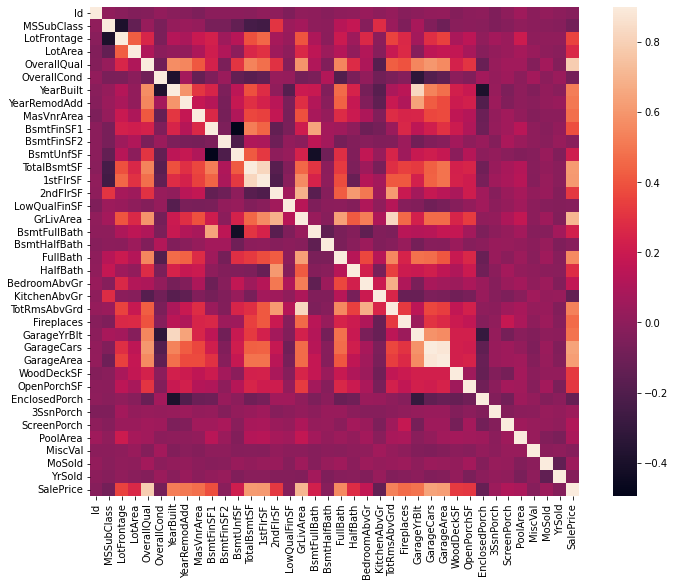

In [19]:
corrmat = train_tmp.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True);

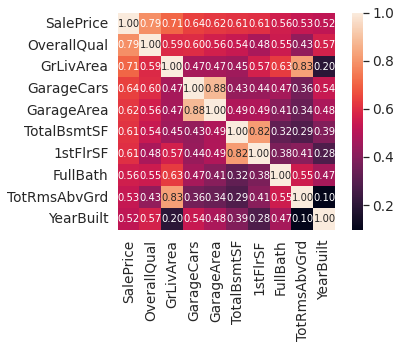

In [20]:
#sale price correlation matrix
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_tmp[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'GarageCars' and 'GarageArea' have high correlation so we will keep only 'GarageCars' since it has higher correlation with 'SalePrice' morethan 'GarageArea'
* 'TotalBsmtSF' and '1stFlrSF' in this case we will keep 'TotalBsmtSF'
* 'GrLivArea' and 'TotRmsAbvGrd' in this case we will keep 'GrLivArea'


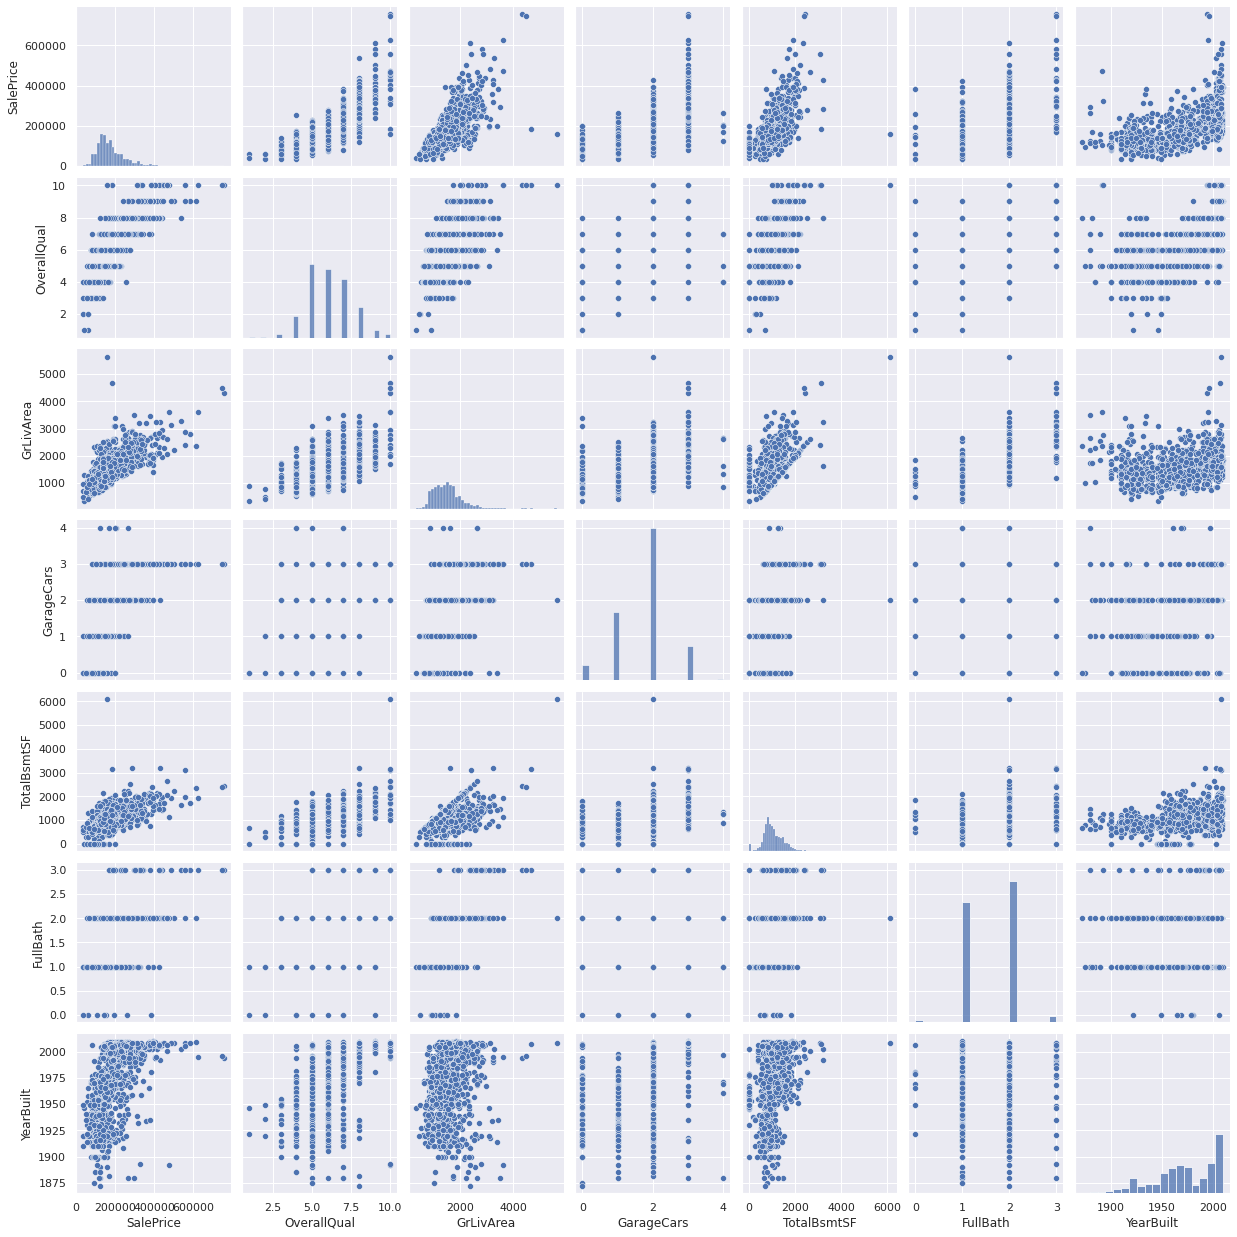

In [21]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'] 
sns.pairplot(train_tmp[cols], size=2.5)
plt.show();

### Missing data

In [22]:
total = train_tmp.isnull().sum().sort_values(ascending=False)
percent = (train_tmp.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [23]:
def  preprocess_data(df):
      df.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","LotFrontage","GarageYrBlt","GarageCond","GarageType","GarageFinish","GarageQual"],axis=1,inplace=True) 
      df.drop(["GarageArea","1stFlrSF","TotRmsAbvGrd"],axis=1,inplace=True) #from heatmap above 
      for label, content in df.items():
          if pd.api.types.is_numeric_dtype(content):
              if pd.isnull(content).sum():
                  df[label+"_is_missing"] = pd.isnull(content)
                  df[label] = content.fillna(content.median())

          if not pd.api.types.is_numeric_dtype(content):
              df[label+"_is_missing"] = pd.isnull(content)
              df[label] = pd.Categorical(content).codes+1
      return df

In [24]:
preprocess_data(train_tmp)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,BsmtFinType2_is_missing,Heating_is_missing,HeatingQC_is_missing,CentralAir_is_missing,Electrical_is_missing,KitchenQual_is_missing,Functional_is_missing,PavedDrive_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,8450,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,9600,2,4,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,11250,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,9550,2,1,4,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,14260,2,1,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,4,7917,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1456,1457,20,4,13175,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1457,1458,70,4,9042,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1458,1459,20,4,9717,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False


In [25]:
preprocess_data(test_tmp)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,CentralAir_is_missing,Electrical_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,KitchenQual_is_missing,Functional_is_missing,GarageCars_is_missing,PavedDrive_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,11622,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1,1462,20,4,14267,2,1,4,1,1,1,...,False,False,False,False,False,False,False,False,False,False
2,1463,60,4,13830,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
3,1464,60,4,9978,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
4,1465,120,4,5005,2,1,2,1,5,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,5,1936,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1455,2916,160,5,1894,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1456,2917,20,4,20000,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1457,2918,85,4,10441,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False


In [26]:
# Check if columns contain strings
for label, content in train_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [27]:
train_tmp.isnull().sum().max()

0

In [28]:
test_tmp.isnull().sum().max()

0

### Outlier

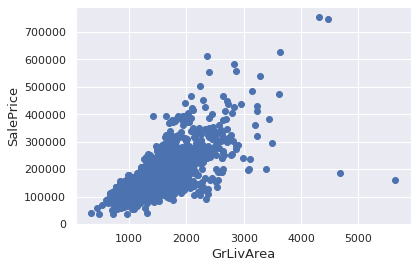

In [29]:
fig, ax = plt.subplots()
ax.scatter(x=train_tmp['GrLivArea'], y= train_tmp['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [30]:
# Deleting outliers
train_tmp = train_tmp.drop(train_tmp[(train_tmp['GrLivArea']>4000) & (train_tmp['SalePrice']<300000)].index)

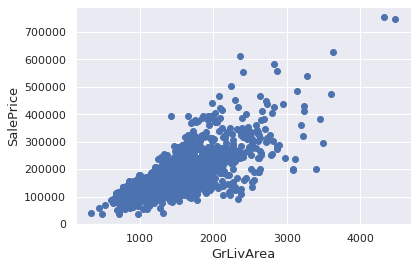

In [31]:
#Check
fig, ax = plt.subplots()
ax.scatter(x=train_tmp['GrLivArea'], y= train_tmp['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Target

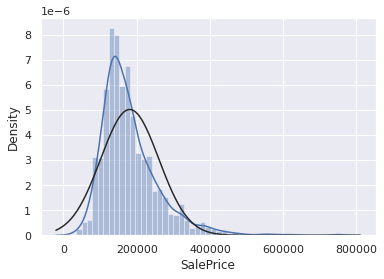

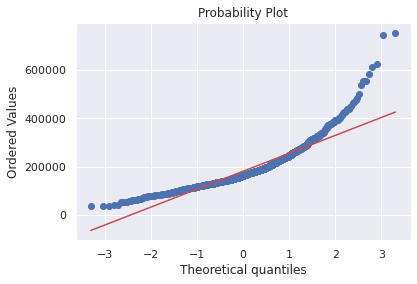

In [32]:
# Check if 'SalePrice' normal?
sns.distplot(train_tmp['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_tmp['SalePrice'], plot=plt)

> Since we use regression our target should be normal

In [33]:
# make target more normally
train_tmp["SalePrice"] = np.log1p(train_tmp["SalePrice"])

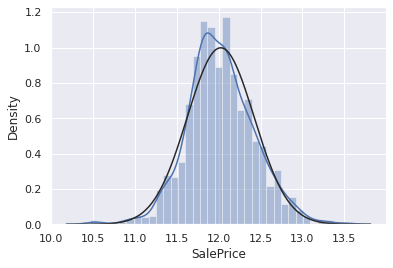

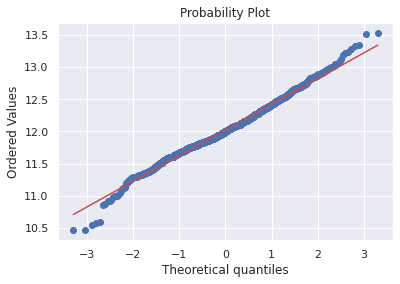

In [34]:
#Check 
sns.distplot(train_tmp['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train_tmp['SalePrice'], plot=plt)

In [35]:
train_tmp.shape, test_tmp.shape

((1458, 102), (1459, 108))

In [36]:
# Find how the columns differ using sets
set(test_tmp.columns) - set(train_tmp.columns) 

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [37]:
train_tmp["BsmtFinSF1_is_missing"]= False
train_tmp["BsmtFinSF2_is_missing"]= False
train_tmp["BsmtFullBath_is_missing"] = False
train_tmp["BsmtHalfBath_is_missing"] = False
train_tmp["BsmtUnfSF_is_missing"]= False
train_tmp["GarageCars_is_missing"] = False
train_tmp["TotalBsmtSF_is_missing"] = False
train_tmp.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive_is_missing,SaleType_is_missing,SaleCondition_is_missing,BsmtFinSF1_is_missing,BsmtFinSF2_is_missing,BsmtFullBath_is_missing,BsmtHalfBath_is_missing,BsmtUnfSF_is_missing,GarageCars_is_missing,TotalBsmtSF_is_missing
0,1,60,4,8450,2,4,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
1,2,20,4,9600,2,4,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False
2,3,60,4,11250,2,1,4,1,5,1,...,False,False,False,False,False,False,False,False,False,False
3,4,70,4,9550,2,1,4,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,5,60,4,14260,2,1,4,1,3,1,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#check
train_tmp.shape, test_tmp.shape

((1458, 109), (1459, 108))

## 5. Modelling
Following the [Scikit-Learn machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we find a [RandomForestRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforestregressor#sklearn.ensemble.RandomForestRegressor). might be a good candidate.

In [39]:
# Split data into X & y
X = train_tmp.drop(["SalePrice"], axis=1)
y = train_tmp.SalePrice

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 500, 10),
               "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2),
                "max_features": [0.5, 1, "sqrt", "auto"],
                "max_samples": [1000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                                                 param_distributions=rf_grid,
                                                 n_iter=100,
                                                 cv=5,
                                                 verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 5.89 s, sys: 58 ms, total: 5.95 s
Wall time: 6.97 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   verbose=True)

In [42]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 15,
 'max_samples': 1000,
 'max_features': 1,
 'max_depth': 10}

In [43]:
model1 = RandomForestRegressor(n_estimators=370,
                               min_samples_split=8,
                               min_samples_leaf=7,
                               max_features='sqrt',
                               max_depth=None,
                               n_jobs=-1,
                               max_samples=None)
model1.fit(X_train,y_train)
test_preds = model1.predict(test_tmp)
model1.score(X_train,y_train)

0.8958343219289687

In [44]:
model2 = RandomForestRegressor(n_estimators=500)
model2.fit(X_train, y_train)
preds = np.expm1(model2.predict(test_tmp))
model2.score(X_train,y_train)

0.9833273521028704

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"MAE": mean_absolute_error(y_train, train_preds),
                   "RMSE": sqrt(mean_squared_error(y_train, train_preds)),
                   "R^2": model.score(X_train, y_train),}
    return scores

In [46]:
show_scores(model1)

{'MAE': 0.08364690947068754,
 'RMSE': 0.1280561553397303,
 'R^2': 0.8958343219289687}

In [47]:
show_scores(model2)

{'MAE': 0.03497856221001175,
 'RMSE': 0.051231895621140305,
 'R^2': 0.9833273521028704}

> model2 is better

## Submission

In [48]:
df= pd.DataFrame()
df["Id"] = test_tmp["Id"]
df["SalePrice"] = preds
df

,Id,SalePrice
0,1461,124135.451187
1,1462,151528.320051
2,1463,175191.085592
3,1464,182121.385985
4,1465,200413.101076
...,...,...
1454,2915,86915.373246
1455,2916,87064.638411
1456,2917,153840.252139
1457,2918,115378.600122


In [49]:
df.to_csv('/content/drive/MyDrive/Project/house price/data/submission.csv',index=False)

### Feature importance

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
model2.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [52]:
model2.feature_importances_

array([5.19380372e-03, 3.77592073e-03, 7.10253175e-03, 1.68400089e-02,
       6.68521352e-05, 2.14149676e-03, 8.13730116e-04, 1.18568237e-06,
       9.55577652e-04, 6.92624220e-04, 5.85312333e-03, 1.09646601e-03,
       8.56701125e-05, 8.39806905e-04, 1.44589773e-03, 5.34442049e-01,
       9.66825434e-03, 2.10818577e-02, 1.02956314e-02, 8.59544571e-04,
       9.84840423e-05, 1.85079201e-03, 1.99892386e-03, 8.03559442e-04,
       3.64014163e-03, 1.86992688e-03, 1.21645285e-03, 8.24559490e-04,
       5.48745205e-03, 1.34675665e-03, 1.36404715e-03, 2.09130692e-03,
       2.52862224e-02, 5.62830773e-04, 6.13041237e-04, 6.84843924e-03,
       6.72652202e-02, 7.06129365e-04, 1.59541633e-03, 1.76011259e-02,
       5.90921233e-04, 5.81033492e-03, 1.57570210e-04, 1.33899401e-01,
       1.31867643e-03, 2.81233867e-04, 2.04640086e-03, 1.15573658e-03,
       1.80840261e-03, 1.52959758e-03, 2.85385677e-03, 1.31193359e-03,
       5.57288690e-03, 4.98841176e-02, 1.77621001e-03, 4.25479617e-03,
      

In [67]:
def plot_features(columns, importances, n=20):
    dff = (pd.DataFrame({'features':columns,
                         'feature_importance':importances})
          .sort_values('feature_importance', ascending=False)
          .reset_index(drop=True))
    sns.barplot(x='feature_importance',
                y='features',
                data=dff[:n],
                orient='h')

In [68]:
X_train = pd.DataFrame(X_train, columns= X.columns)

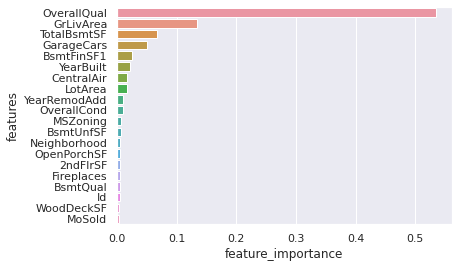

In [69]:
plot_features(X_train.columns, model2.feature_importances_)